# Relatório de Análise VII

## Criando Agrupamentos

In [66]:
import pandas as pd
dados = pd.read_csv('aluguel_residencial_dropna.csv', sep = ';')
dados.head()

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU,Valor m2,Tipo Agregado
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0,42.50,Apartamento
1,Casa,Jardim Botânico,2,0,1,100,7000.0,0.0,0.0,70.00,Casa
2,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0,53.33,Apartamento
3,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,0.0,16.67,Apartamento
4,Apartamento,Cachambi,2,0,0,50,1300.0,301.0,17.0,26.00,Apartamento


In [67]:
dados['Valor'].mean()

5046.172821405663

In [68]:
# calculando valor medio por bairro

In [69]:
bairros = ['Barra da Tijuca', 'Copacabana', 'Ipanema', 'Leblon', 'Botafogo', 'Flamengo', 'Tijuca']
selecao = dados['Bairro'].isin(bairros)
dados = dados[selecao]

In [70]:
dados['Bairro'].drop_duplicates()

0          Copacabana
5     Barra da Tijuca
15             Tijuca
19            Ipanema
23           Botafogo
27             Leblon
78           Flamengo
Name: Bairro, dtype: object

In [71]:
grupo_bairro = dados.groupby('Bairro')
type(grupo_bairro)

pandas.core.groupby.generic.DataFrameGroupBy

In [72]:
grupo_bairro.groups

{'Barra da Tijuca': Int64Index([    5,    14,    16,    21,    30,    32,    35,    42,    43,
                60,
             ...
             21769, 21771, 21774, 21782, 21800, 21801, 21811, 21812, 21813,
             21820],
            dtype='int64', length=3863),
 'Botafogo': Int64Index([   23,    48,    87,    88,   111,   119,   127,   134,   196,
               200,
             ...
             21471, 21487, 21499, 21529, 21653, 21660, 21666, 21715, 21746,
             21790],
            dtype='int64', length=873),
 'Copacabana': Int64Index([    0,     9,    10,    11,    24,    25,    28,    31,    86,
                91,
             ...
             21707, 21713, 21736, 21743, 21780, 21783, 21795, 21809, 21810,
             21815],
            dtype='int64', length=2644),
 'Flamengo': Int64Index([   78,   138,   218,   284,   321,   347,   356,   361,   369,
               393,
             ...
             21527, 21560, 21581, 21629, 21680, 21704, 21728, 21731, 21740,
  

In [73]:
grupo_bairro[['Valor', 'Condominio']].mean().round(2)

,Valor,Condominio
Bairro,,
Barra da Tijuca,7069.55,3591.01
Botafogo,8791.83,976.28
Copacabana,4126.68,1148.68
Flamengo,4113.53,1102.15
Ipanema,9352.00,2244.44
Leblon,8746.34,2107.18
Tijuca,2043.52,711.69


# Estatística Descritivas

In [74]:
grupo_bairro['Valor'].describe().round(2)

,count,mean,std,min,25%,50%,75%,max
Bairro,,,,,,,,
Barra da Tijuca,3863.0,7069.55,11874.15,800.0,2500.0,4500.0,8500.0,600000.0
Botafogo,873.0,8791.83,152202.41,700.0,2200.0,3000.0,4350.0,4500000.0
Copacabana,2644.0,4126.68,3611.41,100.0,2000.0,3000.0,4800.0,35000.0
Flamengo,714.0,4113.53,3839.13,800.0,1900.0,2900.0,4975.0,35000.0
Ipanema,1764.0,9352.00,8219.72,1200.0,4500.0,7000.0,11000.0,90000.0
Leblon,1258.0,8746.34,7004.04,100.0,4500.0,7000.0,10500.0,100000.0
Tijuca,1100.0,2043.52,1664.34,750.0,1500.0,1800.0,2300.0,45000.0


In [75]:
grupo_bairro['Valor'].aggregate(['min', 'max']).rename(columns = {'min': 'Mínimo', 'max': 'Máximo'})

,Mínimo,Máximo
Bairro,,
Barra da Tijuca,800.0,600000.0
Botafogo,700.0,4500000.0
Copacabana,100.0,35000.0
Flamengo,800.0,35000.0
Ipanema,1200.0,90000.0
Leblon,100.0,100000.0
Tijuca,750.0,45000.0


In [76]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.rc('figure', figsize = (20, 10))

Text(0.5, 1.0, 'Valor Médio do Aluguel por Bairro')

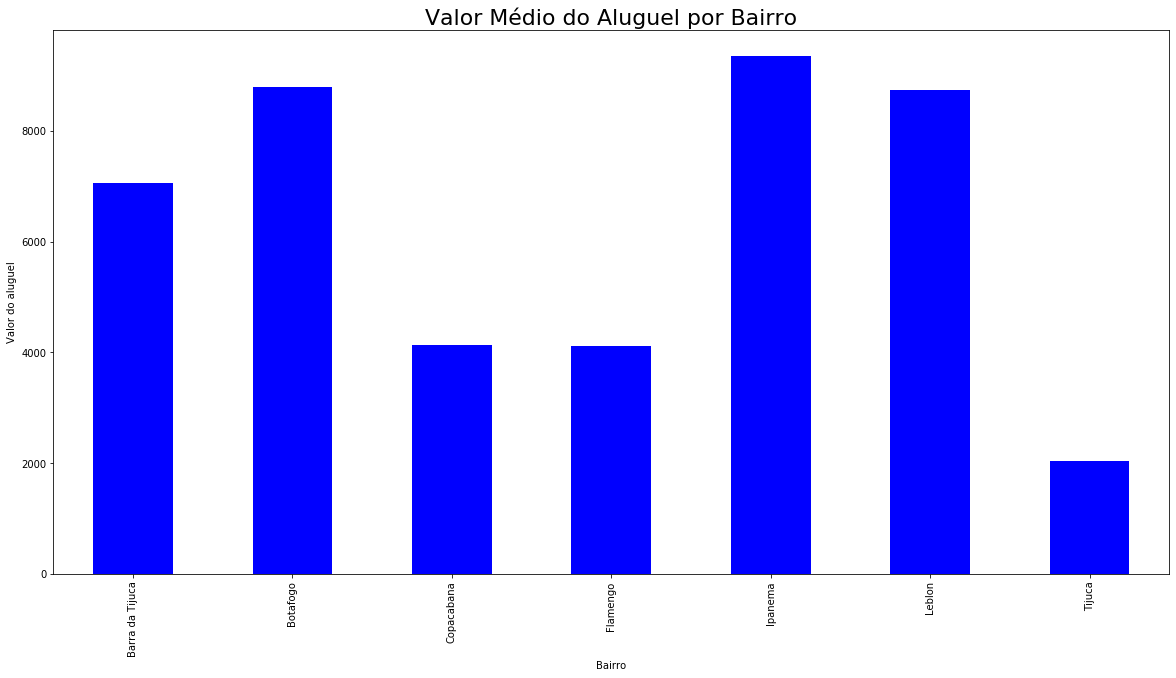

In [77]:
fig = grupo_bairro['Valor'].mean().plot.bar(color = 'blue')
fig.set_ylabel('Valor do aluguel')
fig.set_title('Valor Médio do Aluguel por Bairro', {'fontsize': 22})

Text(0.5, 1.0, 'Valor Médio do Aluguel por Bairro')

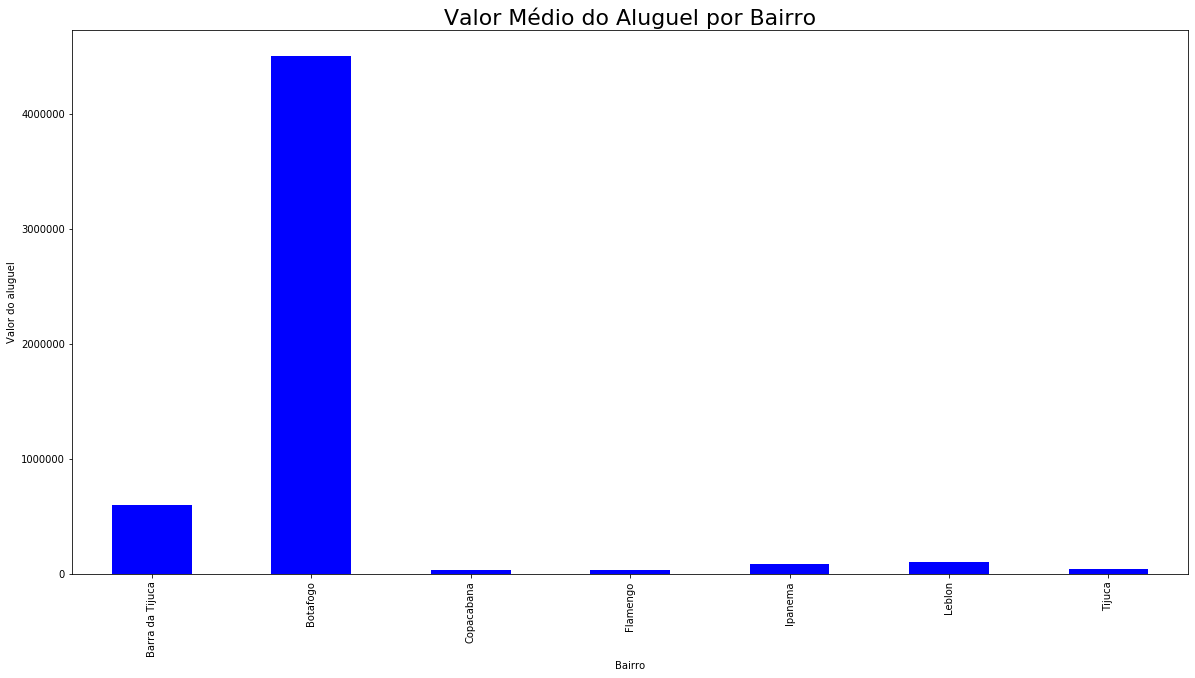

In [78]:
fig = grupo_bairro['Valor'].max().plot.bar(color = 'blue')
fig.set_ylabel('Valor do aluguel')
fig.set_title('Valor Médio do Aluguel por Bairro', {'fontsize': 22})

In [79]:
# Calculando o valor media do aluguel por numero de quartos

In [80]:
dados.head()

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU,Valor m2,Tipo Agregado
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0,42.50,Apartamento
5,Casa de Condomínio,Barra da Tijuca,5,4,5,750,22000.0,0.0,0.0,29.33,Casa
9,Apartamento,Copacabana,1,0,1,40,2000.0,561.0,50.0,50.00,Apartamento
10,Quitinete,Copacabana,1,0,0,27,1800.0,501.0,0.0,66.67,Apartamento
11,Apartamento,Copacabana,4,3,1,243,13000.0,2000.0,803.0,53.50,Apartamento


In [96]:
dados['Quartos'].drop_duplicates()

0         1
5         5
11        4
14        2
19        3
78        0
293      14
334      12
511       6
2327      7
3366      8
4375     10
20830    11
Name: Quartos, dtype: int64

In [101]:
dados_quartos = dados.groupby('Quartos')
dados_quartos.groups

{0: Int64Index([   78,   917,   919,  1044,  1261,  1360,  1543,  1853,  2457,
              2815,  2823,  3074,  3588,  3722,  3943,  4543,  4636,  4821,
              4835,  4837,  5008,  5824,  5870,  5953,  6057,  6497,  6809,
              7096,  7115,  7236,  7256,  7431,  7499,  7747,  7914,  7962,
              7986,  8531,  8728,  8961,  9064,  9317,  9587,  9712,  9723,
              9802, 10130, 10682, 10778, 10956, 10971, 11728, 11754, 12341,
             12488, 13168, 13557, 13735, 14339, 14629, 14634, 14679, 15038,
             15150, 15925, 16079, 16566, 16775, 16798, 16982, 17165, 17226,
             17293, 17470, 17622, 17909, 17982, 18425, 18470, 19016, 19260,
             19489, 19789, 20920, 21077],
            dtype='int64'),
 1: Int64Index([    0,     9,    10,    20,    28,    39,    40,    79,    86,
               127,
             ...
             21728, 21743, 21783, 21794, 21796, 21800, 21808, 21810, 21815,
             21818],
            dtype='int64', len

In [104]:
dados_quartos[['Valor', 'Condominio']].mean().round(2)

,Valor,Condominio
Quartos,,
0,1676.82,435.41
1,2329.47,731.49
2,3508.31,3093.08
3,5857.23,1662.76
4,13547.95,2772.68
5,17445.07,2346.28
6,16784.00,1798.94
7,19157.89,2292.89
8,16500.00,2406.75


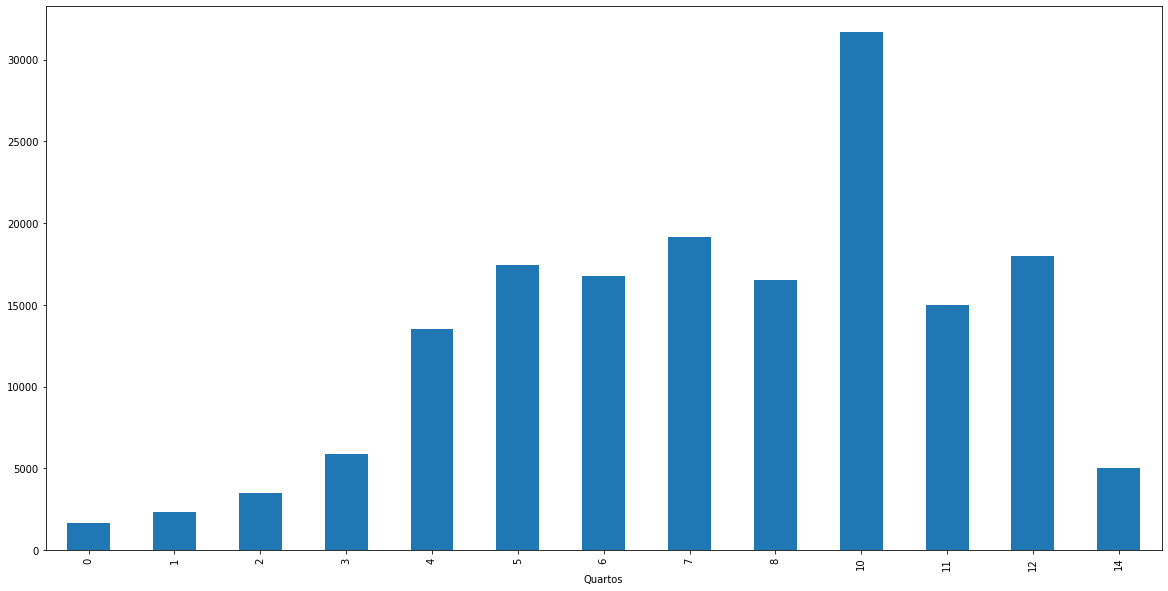

In [108]:
dados_quartos['Valor'].mean().plot.bar()

In [109]:
# Calculando valor medio do aluguel pelo numero de suites.

In [110]:
dados.head()

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU,Valor m2,Tipo Agregado
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0,42.50,Apartamento
5,Casa de Condomínio,Barra da Tijuca,5,4,5,750,22000.0,0.0,0.0,29.33,Casa
9,Apartamento,Copacabana,1,0,1,40,2000.0,561.0,50.0,50.00,Apartamento
10,Quitinete,Copacabana,1,0,0,27,1800.0,501.0,0.0,66.67,Apartamento
11,Apartamento,Copacabana,4,3,1,243,13000.0,2000.0,803.0,53.50,Apartamento


In [112]:
dados['Suites'].drop_duplicates()

0       0
5       5
9       1
16      2
43      3
60      4
511     6
2327    7
Name: Suites, dtype: int64

In [114]:
dados_suite = dados.groupby('Suites')

In [117]:
dados_suite.groups

{0: Int64Index([    0,    10,    15,    18,    20,    23,    25,    27,    28,
                31,
             ...
             21783, 21794, 21795, 21796, 21800, 21810, 21812, 21815, 21818,
             21825],
            dtype='int64', length=4236),
 1: Int64Index([    9,    11,    14,    19,    21,    32,    35,    48,    52,
                53,
             ...
             21771, 21774, 21785, 21786, 21788, 21790, 21808, 21809, 21811,
             21816],
            dtype='int64', length=5115),
 2: Int64Index([   16,    24,    30,    68,    93,   114,   130,   151,   161,
               162,
             ...
             21697, 21703, 21711, 21722, 21746, 21763, 21780, 21787, 21813,
             21817],
            dtype='int64', length=1356),
 3: Int64Index([   43,   112,   186,   194,   283,   302,   311,   360,   377,
               387,
             ...
             21530, 21590, 21650, 21693, 21724, 21745, 21757, 21758, 21777,
             21801],
            dtype='int64'

In [119]:
dados_suite[['Valor', 'Condominio']].mean().round(2)

,Valor,Condominio
Suites,,
0,2951.35,853.23
1,6097.99,2896.32
2,9525.30,2461.20
3,11374.25,2599.31
4,15304.65,3045.16
5,21236.66,2431.47
6,21812.88,1594.75
7,28750.00,4345.50


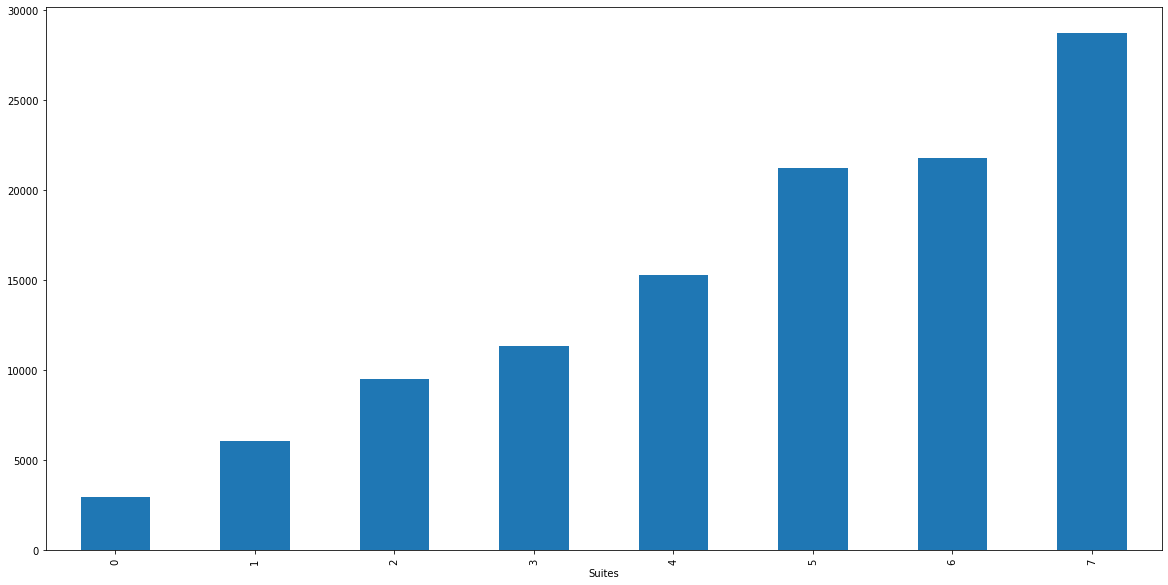

In [120]:
dados_suite['Valor'].mean().plot.bar()